[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **CAP-394 – Introdução à Ciência de Dados (2022)**

**Professores:**
*Dr. Rafael Duarte Coelho Dos Santos e Dr. Gilberto Ribeiro De Queiroz*

**Aluno :**
*Lourenço José Cavalcante Neto*

---

**ATIVIDADE 01:  Análise básica do Dataset**

**Descrição da Atividade:**

1. Preparar o primeiro notebook contendo uma análise básica dos dados, demonstrando:
  * A estrutura dos dados;
  * Visualização básica dos dados;
  * etc...


# **Introdução**

A ciência de dados é a prática de mineração de grandes conjuntos de dados brutos, estruturados e não estruturados, para identificar padrões e extrair deles insights acionáveis. Este é um campo interdisciplinar, e os fundamentos da ciência de dados incluem estatísticas, inferência, ciência da computação, análise preditiva, desenvolvimento de algoritmos de aprendizado de máquina e novas tecnologias para obter insights de big data.

Para definir a ciência de dados e melhorar o gerenciamento de projetos de ciência de dados, comece com seu ciclo de vida. O primeiro estágio no fluxo de trabalho do pipeline de ciência de dados envolve a captura: adquirir dados, às vezes extraí-los e inseri-los no sistema. O próximo estágio é a manutenção, que inclui armazenamento de dados, limpeza de dados, processamento de dados, preparação de dados e arquitetura de dados.

Este notebook contém uma análise básica de dados, tal qual procurou-se demonstrar a sua estrutura,visualização básica etc. Para isso, foi selecionado um dataset no qual a sua origem é de um equipamento chamado **Disdrômetro RD80** (também chamado de **Joss**),instalado nas proximidades da torre **ATTO**, em um sítio chamado Campina, na região Amazônica. O disdrômetro RD80 mede a distribuição das gotas de chuva que chegam à superfície.


Este notebook pode ser acessado no **github**: https://github.com/lourencocavalcante/Introduction-to-Data-Science.git

# **Dataset**
 
Os Dados são de dois equipamentos instalados próximo à torre **ATTO**, em um sítio chamado Campina, na região amazônica. **Radiômetro de microondas MP3000A:** Este mede diversas variáveis: Ambiente, Radiância no espectro de onda do microonda em diversos canais e Estimativas de parâmetros de nuvens. 
**Disdrômetro RD80 (Joss):** Mede adistribuição das gotas de chuva que chegam à superfície;


<img src="https://github.com/lourencocavalcante/Introduction-to-Data-Science/blob/e47238ac99a525a4972b534bf9c4950ee85b1b89/Figuras/disdrometro-rd80.gif?raw=true" width = 500 align="left">


Os dois equipamentos estão instalados próximos à torre ATTO, em um sítio chamado Campina, na região amazônica;


Período de dados: De 17 de março de 2020 a 07 Julho 2022.



```
level1_output_sfc
Neste arquivo estão os dados do ambiente próximo à superfície.
Mês, dia, Ano (YY), Hora, Minuto, segundos, Tamb(K), Rh(%), Pres(mb), Tir(K), Rain, DataQuality 
Tamb - Temperatura do Ambiente
Rh - Umidade Relativa
Pres - Pressão
Tir - Temperatura no canal Infravermelho

level1_output_bt
Neste arquivos estão os dados das medidas dos canais do microonda.
Mês, dia, Ano (YY), Hora, Minuto, segundos, Ch  22.234, Ch  22.500, Ch  23.034, Ch  23.834,
Ch  25.000, Ch  26.234, Ch  28.000, Ch  30.000, Ch  51.248, Ch  51.760, Ch  52.280, Ch  52.804, Ch  53.336, Ch  53.848, Ch  54.400, Ch  54.940,
Ch  55.500, Ch  56.020, Ch  56.660, Ch  57.288, Ch  57.964, Ch  58.800, DataQuality
A unidade é K (Kelvin). Assim como é para Tamb e Tir.

level2_output_cld_atto
Neste arquivos estão as variáveis estimadas associadas a parâmetros de nuvens.
Mês, dia, Ano (YY), Hora, Minuto, segundos, Int. Vapor(cm),Int. Liquid(mm),Cloud Base(km),DataQuality
Int. Vapor - Vapor integrado na atmosfera
Int. Liquid - Conteúdo de água líquida integrado na nuvem
Cloud Base - A altura da base da nuvem

JWD_campina_report_RZLwcDmDtNdrop_b2.1_report
Ano (YYYY), mês, dia, hora, minuto, segundos,Rain Intensity (mm/h), radar
 reflectivity (1/mm6m3),Liquid watercontent (g/m3),Mean weight diameter(mm),
  Time integration (s), N(D)(20 colunas associadas aos diametros dasgotas de chuva)

```

**Bibliotecas**

A célula abaixo faz a importação das bibliotecas que serão utilizadas na análise dos dados.

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

import datetime


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importando os dados e definição dos Dataframes**


In [27]:
#Dados do disdrômetro RD80. Chamado comumente de Joss. 
#Este equipamento mede adistribuição das gotas de chuva que chegam à superfície. (df_rd80_joss)
df_rd80_joss = pd.read_table('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/JWD_campina_report_RZLwcDmDtNdrop_b2.1_report.txt',header=None,delim_whitespace=True)


#Dados do radiômetro de microondas MP3000A. Esse instrumento mede diversas variáveis:

#Variáveis de ambiente (dados_ambi_superficie)
df_mp3000A_1 = pd.read_table('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/level1_output_sfc.txt',header=None,delim_whitespace=True)
#Radiância no espectro de onda do microonda em diversos canais (dados_med_canais_micro)
df_mp3000A_2 = pd.read_table('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/level1_output_bt.txt',header=None,delim_whitespace=True)
#Estimativas de parâmetros de nuvens (dados_est_param_nuvens)
df_mp3000A_3 = pd.read_table('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/level2_output_cld_atto.txt',header=None,delim_whitespace=True)


In [34]:
list_datasets = [df_rd80_joss, df_mp3000A_1, df_mp3000A_2, df_mp3000A_3]

**Tamanho do Dataset**

In [35]:
for item in list_datasets:
  print('Tamanho do dataset: ',item.shape[0], ', quantiade de atributos: ', item.shape[1])

Tamanho do dataset:  315420 , quantiade de atributos:  31
Tamanho do dataset:  639828 , quantiade de atributos:  12
Tamanho do dataset:  639694 , quantiade de atributos:  29
Tamanho do dataset:  639542 , quantiade de atributos:  10


Visualizando as colunas do Dataset

In [40]:
for itemColumns in list_datasets:
  print(itemColumns.columns,'\n')

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
           dtype='int64') 

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64') 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
           dtype='int64') 

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64') 



**Vamos investigar os tipos de dados que há em cada coluna**

In [41]:
for itemDtypes in list_datasets:
  print(itemDtypes.dtypes,'\n')

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
dtype: object 

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
dtype: object 

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12     object
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26

Visualização rápida dos dados

In [44]:
for itemHead in list_datasets:
  print(itemHead.head(),'\n')

       0    1     2     3     4    5    6    7    8    9   ...   21   22   23  \
0  2020.0  3.0  17.0  13.0  52.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  2020.0  3.0  17.0  13.0  53.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  2020.0  3.0  17.0  13.0  54.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  2020.0  3.0  17.0  13.0  55.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4  2020.0  3.0  17.0  13.0  56.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    24   25   26   27   28   29   30  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 31 columns] 

    0     1     2     3     4     5       6      7        8       9    10   11
0  7.0  27.0  21.0  18.0  13.0  14.0  294.66  59.58  1007.91  300.24  0.0  1.0
1  7.0  27.0  21.0  18.0  13.0  47.0  294.61  59.31  1008.01  300.23  0.0  1.0
2  7.0  27.0  21.

Como vimos, a colunas de dados não vieram com seus nomes. Vamos resolver isso adicionando nome das colunas dos dados do instrumento **rd80** executando a célula abaixo:

In [45]:
#Vamos adicionar os títulos das colunas:
df_rd80_joss.columns = ['Ano', 'Mes', 'dia', 'H', 'M', 'S','Rain_Intensity', 'radar_reflectivity','Liquid_watercontent',
'Mean_weight_diameter_mm', 'Time_integration', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)']


In [46]:
#Modificanto o tipo de dado das colunas referentes a Data e Horário para Inteiro(int)
df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']] = df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']].astype(int)

Vamos visualizar novamente os nossos dados, após definirmos o nome das colunas, de acordo com as suas especificidades:

In [47]:
df_rd80_joss.head()

,Ano,Mes,dia,H,M,S,Rain_Intensity,radar_reflectivity,Liquid_watercontent,Mean_weight_diameter_mm,...,N(D),N(D),N(D),N(D),N(D),N(D),N(D),N(D),N(D),N(D)
0,2020,3,17,13,52,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,3,17,13,53,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,3,17,13,54,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,3,17,13,55,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,3,17,13,56,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pelo que podemos ver, nos dados do **rd80** temos muitas variáveis e os dados referente a data e hora não estão organizados numa mesma coluna. Sendo assim, na célula abaixo iremos remover as colunas que não são do nosso interesse para a análise no momento e também vamos organizar os dados de data e hora numa única coluna (Datetime) e definir o índice. 

In [48]:
df_rd80_joss['Datetime'] = df_rd80_joss[['dia','Mes','Ano', 'H', 'M', 'S']].apply(lambda row:
                    datetime.datetime(year=row['Ano'], month=row['Mes'],day=row['dia'], hour=row['H'], minute=row["M"], second=row["S"]),axis=1)

df_rd80_joss = df_rd80_joss.drop(columns=['Ano', 'Mes', 'dia', 'H', 'M', 'S','N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)'])
df_rd80_joss = df_rd80_joss.set_index('Datetime')
df_rd80_joss.sort_values('Datetime',ascending=True,inplace=True)
df_rd80_joss.head()

,Rain_Intensity,radar_reflectivity,Liquid_watercontent,Mean_weight_diameter_mm,Time_integration
Datetime,,,,,
2020-03-17 13:52:00,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:53:00,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:54:00,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:55:00,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:56:00,0.0,0.0,0.0,0.0,60.0


Para nossa análise, vamos realizar uma normalização no Dataset do **RD80**. Faremos a substituição dos valores da variável **Rain_Intensity (mm/h)**, que forem menores que 0.1, por 0(zero).

In [49]:
df_rd80_joss['Rain_Intensity'][df_rd80_joss['Rain_Intensity'] < 0.1] = 0

Visualização das estatísticas descritivas

In [50]:
#Visualização das estatísticas descritivas
df_rd80_joss.describe()

,Rain_Intensity,radar_reflectivity,Liquid_watercontent,Mean_weight_diameter_mm,Time_integration
count,315420.000000,315420.000000,315420.000000,315420.000000,315420.0
mean,0.372430,309.362454,0.018214,0.114891,60.0
std,3.418582,4704.699349,0.147274,0.356634,0.0
min,0.000000,0.000000,0.000000,0.000000,60.0
25%,0.000000,0.000000,0.000000,0.000000,60.0
50%,0.000000,0.000000,0.000000,0.000000,60.0
75%,0.000000,0.000000,0.000000,0.000000,60.0
max,128.895370,550486.250000,4.893830,5.361310,60.0


In [52]:
#Exportando o Dataframe para o formato CSV
df_rd80_joss.to_csv('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/df_final_rd80_joss.csv')

# **Algumas análises**



Na célula abaixo iremos plotar a correlação entre as variáveis do **rd80**:

In [66]:
sns.set(style='whitegrid')

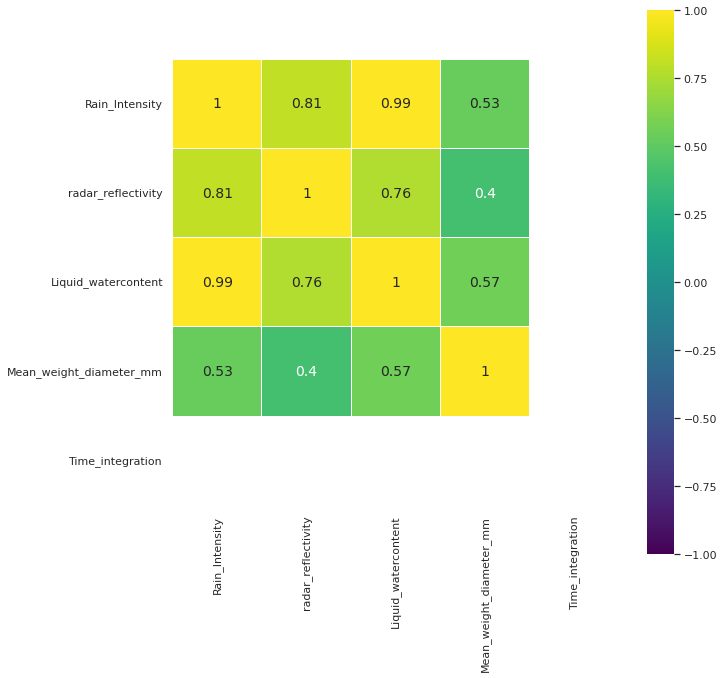

In [67]:
corr = df_rd80_joss.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 14}, square=True);

Rain Intensity (mm/h) X Mean weight diameter(mm)

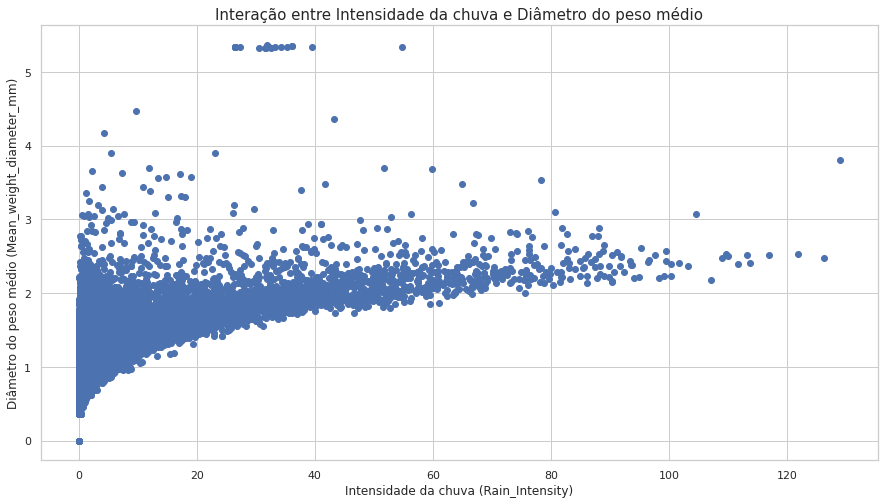

In [68]:
plt.figure(figsize=(15, 8))
plt.scatter(df_rd80_joss.Rain_Intensity, df_rd80_joss.Mean_weight_diameter_mm)
plt.title("Interação entre Intensidade da chuva e Diâmetro do peso médio", size=15)
plt.xlabel('Intensidade da chuva (Rain_Intensity)')
plt.ylabel('Diâmetro do peso médio (Mean_weight_diameter_mm)')
plt.show()

In [70]:
df_rd80_joss.isna().sum()

Rain_Intensity             0
radar_reflectivity         0
Liquid_watercontent        0
Mean_weight_diameter_mm    0
Time_integration           0
dtype: int64

In [71]:
df_rd80_joss.dropna(inplace=True)
df_rd80_joss.reset_index(inplace=True, drop=True)

# **References**

ROSE, T.; CREWELL, S.; LÖHNERT, U.; SIMMER, C. A network suitable microwave radiometer for operational monitoring of the cloudy atmosphere, Atmos. Res., 75, 183–200, 2005.

Tukey, John (1977). Exploratory Data Analysis. Addison-Wesley Publishing Company.